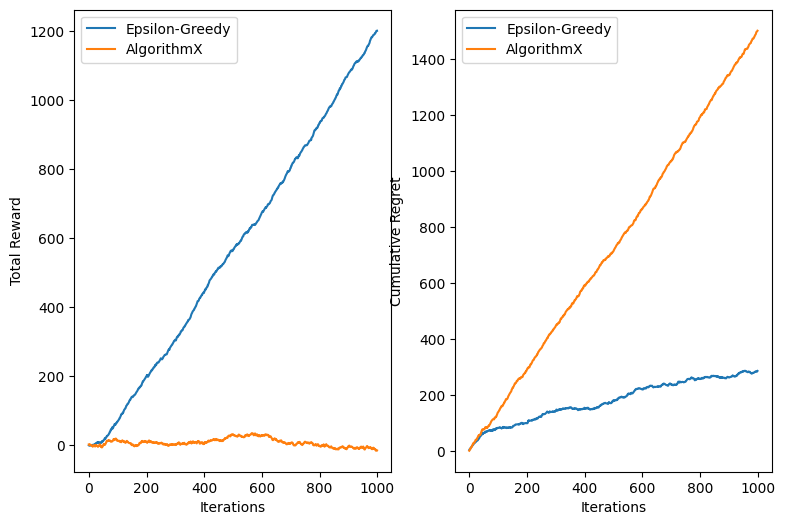

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, k_arms):
        self.k_arms = k_arms
        self.true_rewards = np.random.normal(0, 1, k_arms)
        self.best_arm = np.argmax(self.true_rewards)

    def pull(self, arm):
        return np.random.normal(self.true_rewards[arm], 1)

class EpsilonGreedy:
    def __init__(self, k_arms, epsilon):
        self.k_arms = k_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(k_arms)
        self.arm_counts = np.zeros(k_arms)
        self.total_reward = 0

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, arm, reward):
        self.arm_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.arm_counts[arm]
        self.total_reward += reward

class AlgorithmX:
    def __init__(self, k_arms):
        self.k_arms = k_arms
        self.q_values = np.zeros(k_arms)
        self.arm_counts = np.zeros(k_arms)
        self.total_reward = 0

    def select_arm(self):
        return np.random.randint(self.k_arms)  # Random selection for simplicity

    def update(self, arm, reward):
        self.arm_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.arm_counts[arm]
        self.total_reward += reward

def run_simulation(bandit, algorithm, iterations):
    total_rewards = np.zeros(iterations)
    cumulative_regrets = np.zeros(iterations)
    for i in range(iterations):
        arm = algorithm.select_arm()
        reward = bandit.pull(arm)
        algorithm.update(arm, reward)
        total_rewards[i] = algorithm.total_reward
        optimal_reward = bandit.true_rewards[bandit.best_arm] * (i + 1)
        cumulative_regrets[i] = optimal_reward - algorithm.total_reward
    return total_rewards, cumulative_regrets

k_arms = 10
iterations = 1000
epsilon = 0.1

bandit = MultiArmedBandit(k_arms)

epsilon_greedy = EpsilonGreedy(k_arms, epsilon)
total_rewards_epsilon_greedy, cumulative_regrets_epsilon_greedy = run_simulation(bandit, epsilon_greedy, iterations)

algorithm_x = AlgorithmX(k_arms)
total_rewards_algorithm_x, cumulative_regrets_algorithm_x = run_simulation(bandit, algorithm_x, iterations)

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.plot(total_rewards_epsilon_greedy, label='Epsilon-Greedy')
plt.plot(total_rewards_algorithm_x, label='AlgorithmX')
plt.xlabel('Iterations')
plt.ylabel('Total Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cumulative_regrets_epsilon_greedy, label='Epsilon-Greedy')
plt.plot(cumulative_regrets_algorithm_x, label='AlgorithmX')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Regret')
plt.legend()

plt.show()
